In [ ]:
# 2. Viết chương trình xử lý ảnh cơ bản
# 2.1 Nạp ảnh sử dụng lệnh thư viện Python Image Library 
from PIL import Image
import numpy as np
img = Image.open('bird.png')
img.show()

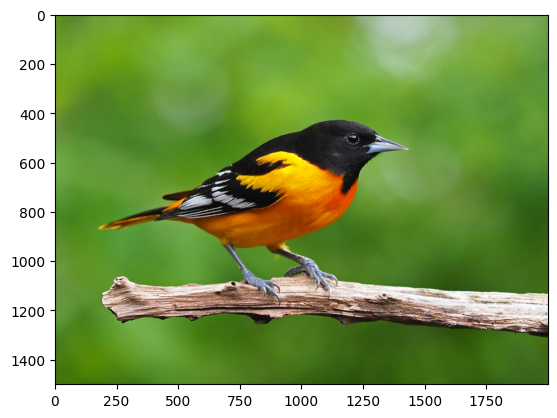

In [ ]:
# 2.2 Nạp ảnh sử dụng lệnh thư viện imageio
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
plt.imshow(data)
plt.show()

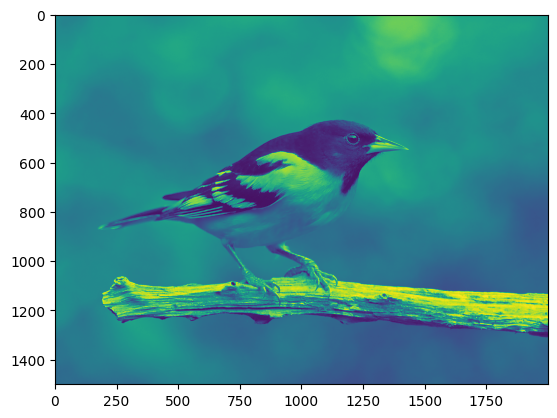

In [5]:
# 2.3 Độ phân giải ảnh
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png',mode='F')
plt.imshow(data)
plt.show()

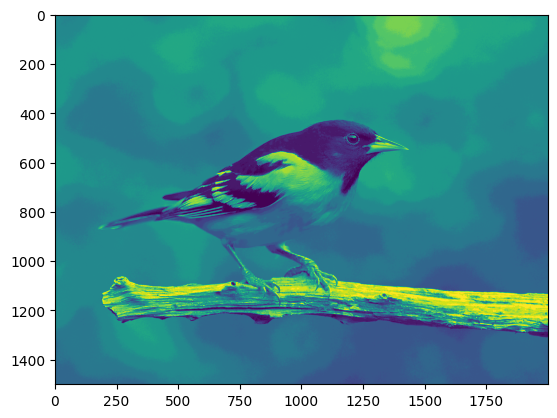

In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='F').astype(np.uint8)
cl = data & 0xF0
iio.imsave('birdf0.png', cl)
tmp = iio.imread('birdf0.png')
plt.imshow(tmp)
plt.show()

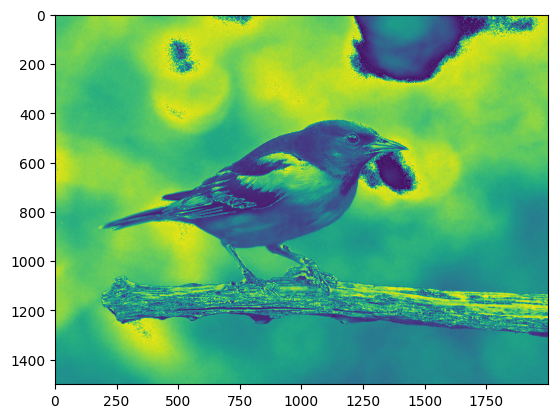

In [9]:
# 2.4 Màu sắc với hệ RGB
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow(bdata)
plt.show()

In [12]:
# 2.5 Màu sắc với hệ HSV
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

a = colorsys.rgb_to_hsv(255, 0, 0)
print(a)
b = colorsys.rgb_to_hsv(1, 0, 0)
print(b)
c = colorsys.rgb_to_hsv(0, 255, 0)
print(c)
d = colorsys.hsv_to_rgb(1, 1, 255)
print(d)

(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(255, 0.0, 0.0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


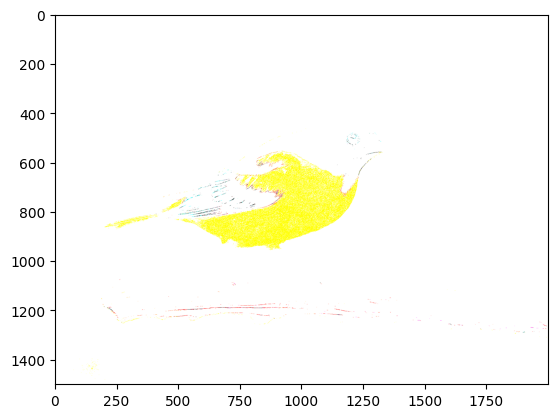

In [16]:
# 2.6 Ứng dụng chuyển hệ màu
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])
h *= h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv2rgb(h, s, v)
rgb2 = np.array(rgb2).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show()

Bài tập

1. Nạp 1 ảnh với 3 màu khác nhau

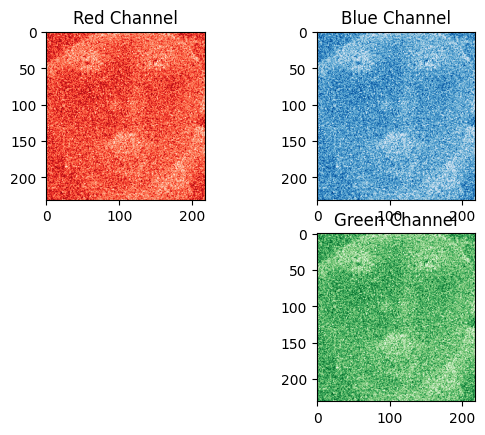

(231, 218, 3)

In [2]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt 
data = iio.imread("exercise/baby.jpeg")
do = data[:, :, 0]
xanhla = data[:, :, 1]
xanhduong = data[:, :, 2]
iio.imsave('do.png', do)

plt.subplot(2, 2, 1)
plt.title("Red Channel")
plt.imshow(data[:, :, 0], cmap = 'Reds')
plt.subplot(2, 2, 2)
plt.title("Blue Channel")
plt.imshow(data[:, :, 2], cmap = 'Blues')
plt.subplot(2, 2, 4)
plt.title("Green Channel")
plt.imshow(data[:, :, 1], cmap = 'Greens')
plt.show()
data.shape

2. Viết chương trình nạp 1 ảnh và hoán đổi giá trị các màu

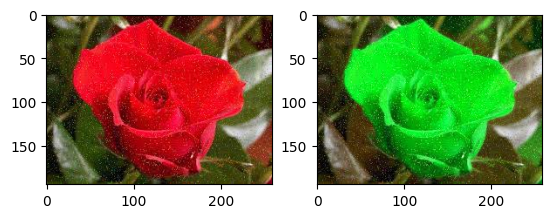

In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt 
data = iio.imread('exercise/flower.jpeg')
swapped = data[:, :, [1, 0, 2]]
iio.imwrite('exercise/flower_xanhla.jpeg', swapped)
plt.subplot(1,2,1)
plt.imshow(data)
plt.subplot(1,2,2)
plt.imshow(swapped)
plt.show()

3. Viết chương trình nạp 1 ảnh , chuyển thành hệ màu HSV và lưu 3 ảnh với 3 màu khác nhau

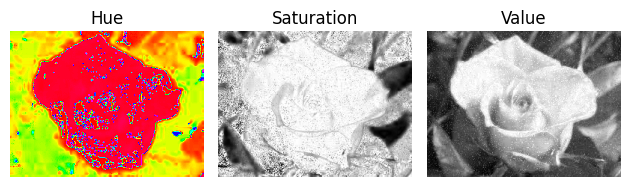

In [5]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import colorsys
img = iio.imread('exercise/flower.jpeg')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(img[:, :, 0] / 255, img[:, :, 1] / 255, img[:, :, 2] / 255)
iio.imwrite('exercise/hue.png', (h * 255).astype(np.uint8))
iio.imwrite('exercise/sat.png', (s * 255).astype(np.uint8))
iio.imwrite('exercise/val.png', (v * 255).astype(np.uint8))
plt.subplot(1, 3, 1)
plt.imshow(h, cmap='hsv')
plt.title('Hue')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value')
plt.axis('off')
plt.tight_layout()
plt.show()

4. Viết chương trinhg nạp 1 ảnh , chuyển sang hệ màu HSV. Lưu ảnh mới với kênh H new = 1/3 H old, V new= 3/4V old

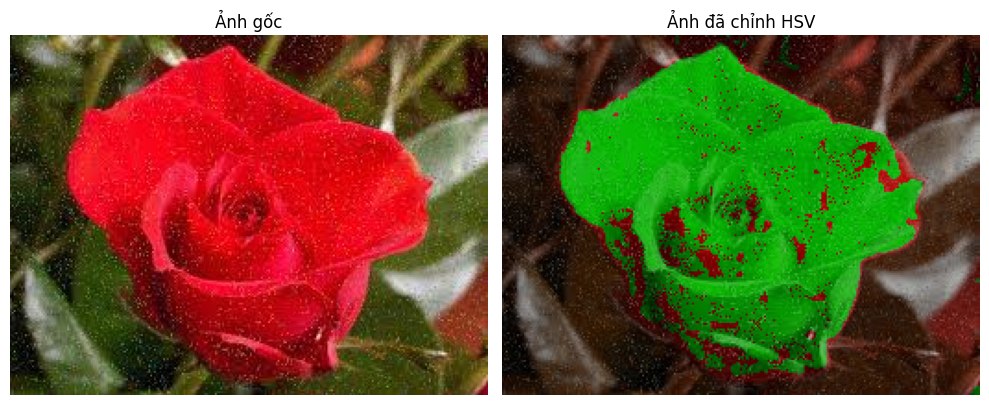

In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import colorsys
img = iio.imread('exercise/flower.jpeg')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
r, g, b = img[:, :, 0]/255, img[:, :, 1]/255, img[:, :, 2]/255
h, s, v = rgb2hsv(r, g, b)
h = h / 3               
v = v * 0.75            
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
r_new, g_new, b_new = hsv2rgb(h, s, v)

rgb_new = np.dstack((r_new, g_new, b_new)) * 255
iio.imwrite('exercise/hsv_modified.png', rgb_new.astype(np.uint8))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Ảnh gốc")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rgb_new.astype(np.uint8))
plt.title("Ảnh đã chỉnh HSV")
plt.axis('off')

plt.tight_layout()
plt.show()
